<a href="https://colab.research.google.com/github/olacienkosz/covid_19_tracker/blob/main/covid_19_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dash

In [2]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import html, dcc, Input, Output
import threading
from google.colab import output

In [3]:
df_covid = pd.read_csv('project_1_python.csv')

In [4]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [5]:
df_covid

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180472,190608,ZWE,Africa,Zimbabwe,2022-06-14,254155.0,0.0,5521.0,0.0,NaN,...,6270096.0,4563366.0,1026048.0,NaN,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180473,190609,ZWE,Africa,Zimbabwe,2022-06-15,254387.0,232.0,5525.0,4.0,NaN,...,6271703.0,4567466.0,1027822.0,7481.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180474,190610,ZWE,Africa,Zimbabwe,2022-06-16,254502.0,115.0,5526.0,1.0,NaN,...,6274305.0,4570349.0,1029463.0,7126.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0
180475,190611,ZWE,Africa,Zimbabwe,2022-06-17,254753.0,251.0,5533.0,7.0,NaN,...,6276402.0,4574222.0,1031790.0,8297.0,15092171.0,19.6,1899.775,61.49,-20.0,30.0


In [6]:
"complete records: " + str(len(df_covid.dropna(how="any"))) + "; total records: " + str(len(df_covid))

'complete records: 7057; total records: 180477'

First visualization - ranking

In [7]:
covid_population = df_covid[['location', 'population']].drop_duplicates()
covid_population

,location,population
0,Afghanistan,39835428.0
846,Albania,2872934.0
1691,Algeria,44616626.0
2536,Andorra,77354.0
3375,Angola,33933611.0
...,...,...
177424,Wallis and Futuna,11094.0
178032,Western Sahara,611872.0
178033,Yemen,30490639.0
178833,Zambia,18920657.0


In [8]:
#sort the data frame by population size and select 15 countries with the largest population
covid_population = covid_population.sort_values(by='population', ascending=False).head(10)
covid_population

,location,population
33499,China,1.444216e+09
74570,India,1.393409e+09
170959,United States,3.329151e+08
75441,Indonesia,2.763618e+08
122998,Pakistan,2.251999e+08
21805,Brazil,2.139934e+08
118134,Nigeria,2.114007e+08
12663,Bangladesh,1.663035e+08
133450,Russia,1.459120e+08
103850,Mexico,1.302622e+08


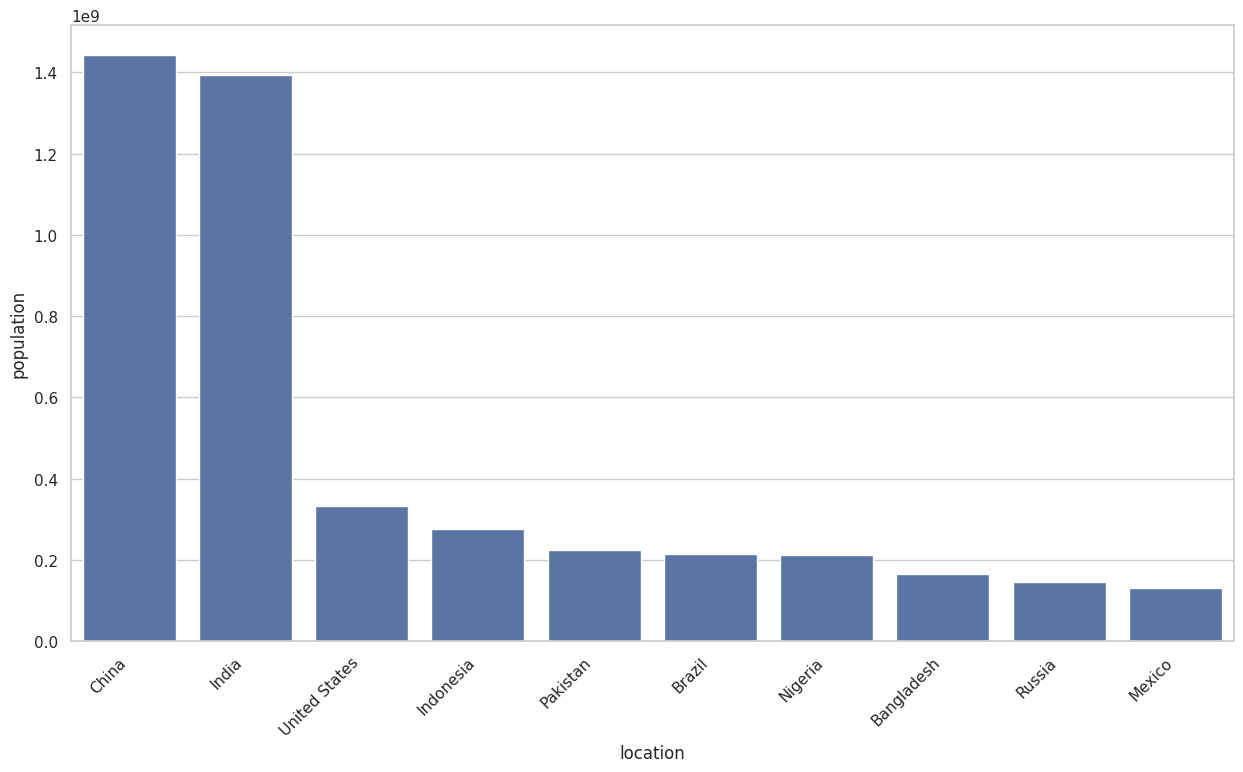

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
population = sns.barplot(data=covid_population,
            x="location",
            y="population"
  );
plt.xticks(rotation=45, ha='right')
plt.show()

Second visualization - population vs life expectancy

In [10]:
df_covid.head(5)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [11]:
df_life = df_covid[['continent', 'location', 'population', 'median_age']].drop_duplicates()
df_life

,continent,location,population,median_age
0,Asia,Afghanistan,39835428.0,18.6
846,Europe,Albania,2872934.0,38.0
1691,Africa,Algeria,44616626.0,29.1
2536,Europe,Andorra,77354.0,NaN
3375,Africa,Angola,33933611.0,16.8
...,...,...,...,...
177424,Oceania,Wallis and Futuna,11094.0,NaN
178032,Africa,Western Sahara,611872.0,28.4
178033,Asia,Yemen,30490639.0,20.3
178833,Africa,Zambia,18920657.0,17.7


In [12]:
life = px.scatter(data_frame=df_life,
  x="population",
  y="median_age",
  color = "continent",
  color_discrete_sequence=px.colors.qualitative.Plotly,
  title='Median age vs. population',
  log_x=True
  );
life.show()

Third visualization - number of diagnosed cases


In [13]:
df_covid.head(3)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [14]:
df_cases = df_covid[['continent', 'location', 'date', 'new_cases']].drop_duplicates()
df_cases

,continent,location,date,new_cases
0,Asia,Afghanistan,2020-02-24,5.0
1,Asia,Afghanistan,2020-02-25,0.0
2,Asia,Afghanistan,2020-02-26,0.0
3,Asia,Afghanistan,2020-02-27,0.0
4,Asia,Afghanistan,2020-02-28,0.0
...,...,...,...,...
180472,Africa,Zimbabwe,2022-06-14,0.0
180473,Africa,Zimbabwe,2022-06-15,232.0
180474,Africa,Zimbabwe,2022-06-16,115.0
180475,Africa,Zimbabwe,2022-06-17,251.0


In [15]:
countries = ['Poland','Iceland']
df_cases2 = df_cases[df_cases['location'].isin(countries)]

In [16]:
df_cases2

,continent,location,date,new_cases
73728,Europe,Iceland,2020-02-28,1.0
73729,Europe,Iceland,2020-02-29,0.0
73730,Europe,Iceland,2020-03-01,2.0
73731,Europe,Iceland,2020-03-02,3.0
73732,Europe,Iceland,2020-03-03,5.0
...,...,...,...,...
130090,Europe,Poland,2022-06-14,321.0
130091,Europe,Poland,2022-06-15,232.0
130092,Europe,Poland,2022-06-16,228.0
130093,Europe,Poland,2022-06-17,48.0


In [17]:
newcase = px.line(data_frame=df_cases2,
  x="date",
  y="new_cases",
  color = "location",
  color_discrete_sequence=px.colors.qualitative.Plotly,
  title='Number of diagnosed cases in Poland and Iceland',
  );
newcase.show()

fourth visualization - covid-19 map

In [18]:
df_covid.head(3)

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [19]:
df_map = df_covid[df_covid['date'] == df_covid['date'].max()]
df_map

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
845,845,AFG,Asia,Afghanistan,2022-06-18,181574.0,40.0,7713.0,0.0,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1690,1690,ALB,Europe,Albania,2022-06-18,277141.0,NaN,3497.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2872934.0,38.0,11803.431,78.57,41.0,20.0
2535,2535,DZA,Africa,Algeria,2022-06-18,265971.0,3.0,6875.0,0.0,NaN,...,NaN,NaN,NaN,NaN,44616626.0,29.1,13913.839,76.88,28.0,3.0
3374,3374,AND,Europe,Andorra,2022-06-18,43449.0,NaN,153.0,0.0,NaN,...,NaN,NaN,NaN,NaN,77354.0,NaN,NaN,83.73,42.5,1.6
4195,4195,AGO,Africa,Angola,2022-06-18,99761.0,0.0,1900.0,0.0,NaN,...,NaN,NaN,NaN,NaN,33933611.0,16.8,5819.495,61.15,-12.5,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177423,187558,VNM,Asia,Vietnam,2022-06-18,10737107.0,699.0,43083.0,0.0,NaN,...,NaN,NaN,NaN,NaN,98168829.0,32.6,6171.884,75.40,16.0,106.0
178031,188167,WLF,Oceania,Wallis and Futuna,2022-06-18,454.0,0.0,7.0,0.0,NaN,...,NaN,NaN,NaN,NaN,11094.0,NaN,NaN,79.94,-13.3,-176.2
178832,188968,YEM,Asia,Yemen,2022-06-18,11823.0,0.0,2149.0,0.0,NaN,...,NaN,NaN,NaN,NaN,30490639.0,20.3,1479.147,66.12,15.0,48.0
179655,189791,ZMB,Africa,Zambia,2022-06-18,324025.0,NaN,3992.0,0.0,NaN,...,NaN,NaN,NaN,NaN,18920657.0,17.7,3689.251,63.89,-15.0,30.0


In [20]:
df_map['cases per population'] = df_map['total_cases'] / df_map['population']
df_map

<ipython-input-20-9641ab95a1b1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude,cases per population
845,845,AFG,Asia,Afghanistan,2022-06-18,181574.0,40.0,7713.0,0.0,NaN,...,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0,0.004558
1690,1690,ALB,Europe,Albania,2022-06-18,277141.0,NaN,3497.0,0.0,NaN,...,NaN,NaN,NaN,2872934.0,38.0,11803.431,78.57,41.0,20.0,0.096466
2535,2535,DZA,Africa,Algeria,2022-06-18,265971.0,3.0,6875.0,0.0,NaN,...,NaN,NaN,NaN,44616626.0,29.1,13913.839,76.88,28.0,3.0,0.005961
3374,3374,AND,Europe,Andorra,2022-06-18,43449.0,NaN,153.0,0.0,NaN,...,NaN,NaN,NaN,77354.0,NaN,NaN,83.73,42.5,1.6,0.561690
4195,4195,AGO,Africa,Angola,2022-06-18,99761.0,0.0,1900.0,0.0,NaN,...,NaN,NaN,NaN,33933611.0,16.8,5819.495,61.15,-12.5,18.5,0.002940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177423,187558,VNM,Asia,Vietnam,2022-06-18,10737107.0,699.0,43083.0,0.0,NaN,...,NaN,NaN,NaN,98168829.0,32.6,6171.884,75.40,16.0,106.0,0.109374
178031,188167,WLF,Oceania,Wallis and Futuna,2022-06-18,454.0,0.0,7.0,0.0,NaN,...,NaN,NaN,NaN,11094.0,NaN,NaN,79.94,-13.3,-176.2,0.040923
178832,188968,YEM,Asia,Yemen,2022-06-18,11823.0,0.0,2149.0,0.0,NaN,...,NaN,NaN,NaN,30490639.0,20.3,1479.147,66.12,15.0,48.0,0.000388
179655,189791,ZMB,Africa,Zambia,2022-06-18,324025.0,NaN,3992.0,0.0,NaN,...,NaN,NaN,NaN,18920657.0,17.7,3689.251,63.89,-15.0,30.0,0.017125


In [21]:
my_mapbox_token = 'pk.eyJ1Ijoia255c2pvYSIsImEiOiJjbHJkaWU3cjIwM2ZtMmlvMGNncWZ5bW5mIn0.RMZAsUufEVaA4KSWcPOjjQ'
px.set_mapbox_access_token(my_mapbox_token)

In [22]:
cases_map = px.scatter_mapbox(data_frame = df_map,
                              lat='latitude',
                              lon='longitude',
                              color='continent',
                              size = 'cases per population',
                              size_max = 10,
                              hover_data = {'location': True,
                                            'total_cases': True,
                                            'continent': False,
                                            'cases per population': False,
                                            'latitude': False,
                                            'longitude': False},
                              zoom = 1,
                              mapbox_style='dark',
                              title = 'COVID map')
cases_map.show()

DASH 1

In [49]:
list_countries = list(df_covid['location'].drop_duplicates())

In [50]:
dash_app = dash.Dash()
dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19')
    ]),
    html.P("Choose country:"),
    dcc.Dropdown(
        id='country',
        options=[{'value': str(country), 'label': country}
                 for country in list_countries],
        value=list_countries[0]
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
    ])

])

In [51]:
@dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_covid[df_covid['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig

In [52]:
@dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_covid[df_covid['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig

In [53]:
thread = threading.Thread(target=dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

DASH 2

In [43]:
df_dash2 = df_covid[df_covid['date'] == df_covid['date'].max()].fillna(0)

In [44]:
continent_list = list(df_dash2['continent'].drop_duplicates())

In [45]:
metric_dict = {'total_cases': 'Total cases',
               'total_deaths': 'Total deaths',
               'total_tests': 'Total tests',
               'total_vaccinations': 'Total vaccinations',
               'people_fully_vaccinated': 'Number of fully vaccinated'}

In [46]:
dash2_app = dash.Dash()
dash2_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19')
    ]),
    html.P("Choose continent:"),
    dcc.Dropdown(
        id='continent',
        options=[{'value': str(continent), 'label': continent}
                 for continent in continent_list],
        value=continent_list[0]
        ),
    html.P("Choose metric:"),
    dcc.Dropdown(
        id='metric',
        options=[{'value': metric, 'label': metric_label}
                 for metric, metric_label in metric_dict.items()],
        value='total_cases'
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='map')
    ])

])

In [47]:
@dash2_app.callback(
    Output(component_id='map', component_property='figure'),
    [Input(component_id='continent', component_property='value'),
    Input(component_id='metric', component_property='value')]
)
def generate_covid_map(continent, metric):
    df = df_dash2[df_dash2['continent'] == continent]
    map = px.scatter_mapbox(
        data_frame=df,
        lat='latitude',
        lon='longitude',
        size=df[metric],
        size_max=20,
        hover_data={'location': True},
        mapbox_style='dark',
        zoom=1,
        height=600,
        title=f'COVID-19 - {metric_dict[metric]} in {continent}'
    )
    return map

In [48]:
thread_2 = threading.Thread(target=dash2_app.run_server)
thread_2.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

DASH 3

In [54]:
third_dash_app = dash.Dash()

third_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='my-slider'
    ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='first-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='second-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])

In [55]:
@third_dash_app.callback(
    Output(component_id='first-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig_3 = px.bar(
        data_frame=df,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig_3

In [56]:
@third_dash_app.callback(
    Output(component_id='second-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = df_covid['date'].max()
    df = df_covid[df_covid['date'] == max_date]
    df['vaccination_ratio'] = df['total_vaccinations'] / df['population']
    df = df.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig_3 = px.bar(
        data_frame=df,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig_3



In [57]:
thread_3 = threading.Thread(target=third_dash_app.run_server)
thread_3.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>